# MN COVID-19 statistics analysis
## Import the Excel file
Obtain the data for the spreadsheet from
https://www.health.state.mn.us/diseases/coronavirus/situation.html

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

DATE = ['date']
TESTS_COL = ['tests_daily_mdh', 'test_daily_ext', 'tests_total_completed']
CASES_COL = ['cases_positive', 'cases_positive_cumm']
DEATHS_COL = ['deaths_daily_new', 'deaths_total']
HOSP_COL = ['hosp_daily_icu', 'hosp_daily_not_icu', 'hosp_total', 'hosp_icu_total']

testing_df = pd.read_excel('MN_covid.xlsx', sheet_name='testing', index_col='date',
                          names=[y for x in [DATE, TESTS_COL] for y in x])
cases_df = pd.read_excel('MN_covid.xlsx', sheet_name='cases', index_col='date',
                          names=[y for x in [DATE, CASES_COL] for y in x])
deaths_df = pd.read_excel('MN_covid.xlsx', sheet_name='deaths', index_col='date',
                          names=[y for x in [DATE, DEATHS_COL] for y in x])
hosp_df = pd.read_excel('MN_covid.xlsx', sheet_name='hospitalizations', index_col='date',
                          names=[y for x in [DATE, HOSP_COL] for y in x])
mn_covid_df = pd.concat([testing_df, cases_df, deaths_df, hosp_df], axis=1)

mn_covid_df.dtypes

tests_daily_mdh          float64
test_daily_ext           float64
tests_total_completed    float64
cases_positive           float64
cases_positive_cumm      float64
deaths_daily_new         float64
deaths_total             float64
hosp_daily_icu           float64
hosp_daily_not_icu       float64
hosp_total               float64
hosp_icu_total           float64
dtype: object

## Duplicate some MN Dept Health plots as a check

### Testing

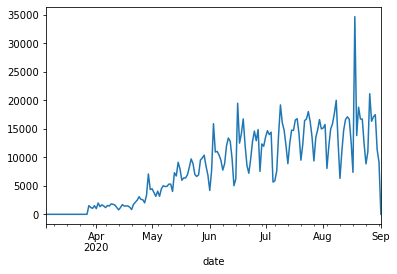

In [13]:
mn_covid_df[['tests_daily_mdh', 'test_daily_ext']].sum(axis=1).plot()

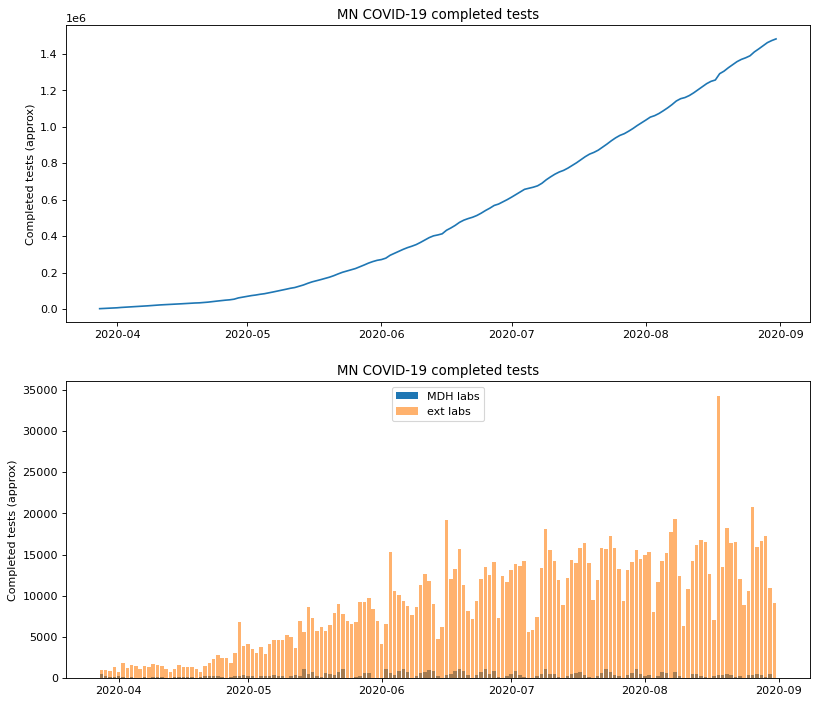

In [14]:
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.autofmt_xdate()
ax_cumm = fig.add_subplot(211)
ax_dly = fig.add_subplot(212)
ax_cumm.plot(mn_covid_df.index, (mn_covid_df["tests_daily_mdh"].cumsum()+mn_covid_df["test_daily_ext"].cumsum()))
#ax_dly.plot(mn_covid_df.index, mn_covid_df["tests_daily_mdh"], mn_covid_df["test_daily_ext"])
ax_dly.bar(mn_covid_df.index, mn_covid_df["tests_daily_mdh"], label='MDH labs')
ax_dly.bar(mn_covid_df.index, mn_covid_df["test_daily_ext"], label='ext labs', alpha=0.6)
ax_dly.legend()
for ax in [ax_cumm, ax_dly]:
    ax.xaxis.set_major_locator(months)
    ax.set_title('MN COVID-19 completed tests')
    ax.set_ylabel('Completed tests (approx)')

### Minnesota Case Overview

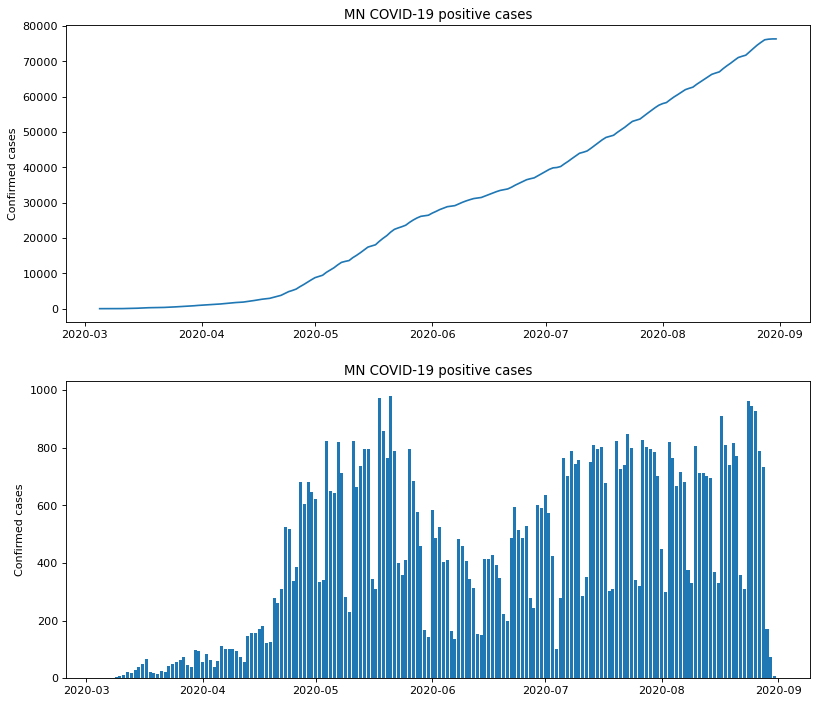

In [15]:
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.autofmt_xdate()
ax_cumm = fig.add_subplot(211)
ax_dly = fig.add_subplot(212)
ax_cumm.plot(mn_covid_df.index, mn_covid_df["cases_positive"].cumsum())
ax_dly.bar(mn_covid_df.index, mn_covid_df["cases_positive"])
for ax in [ax_cumm, ax_dly]:
    ax.xaxis.set_major_locator(months)
    ax.set_title('MN COVID-19 positive cases')
    ax.set_ylabel('Confirmed cases')

### Deaths

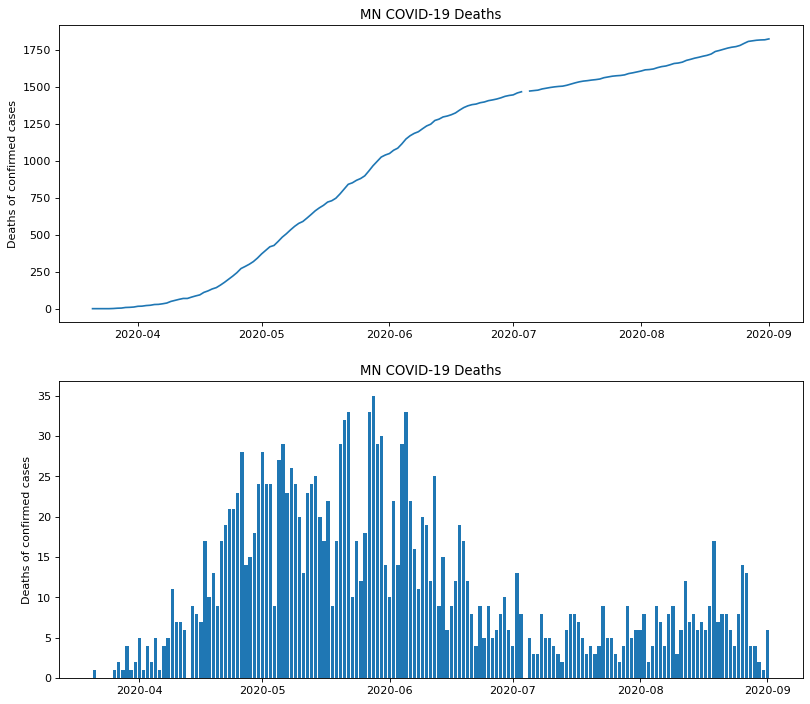

In [16]:
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.autofmt_xdate()
ax_cumm = fig.add_subplot(211)
ax_dly = fig.add_subplot(212)
ax_cumm.plot(mn_covid_df.index, mn_covid_df["deaths_daily_new"].cumsum())
ax_dly.bar(mn_covid_df.index, mn_covid_df["deaths_daily_new"])
for ax in [ax_cumm, ax_dly]:
    ax.xaxis.set_major_locator(months)
    ax.set_title('MN COVID-19 Deaths')
    ax.set_ylabel('Deaths of confirmed cases')

### Hospitalizations

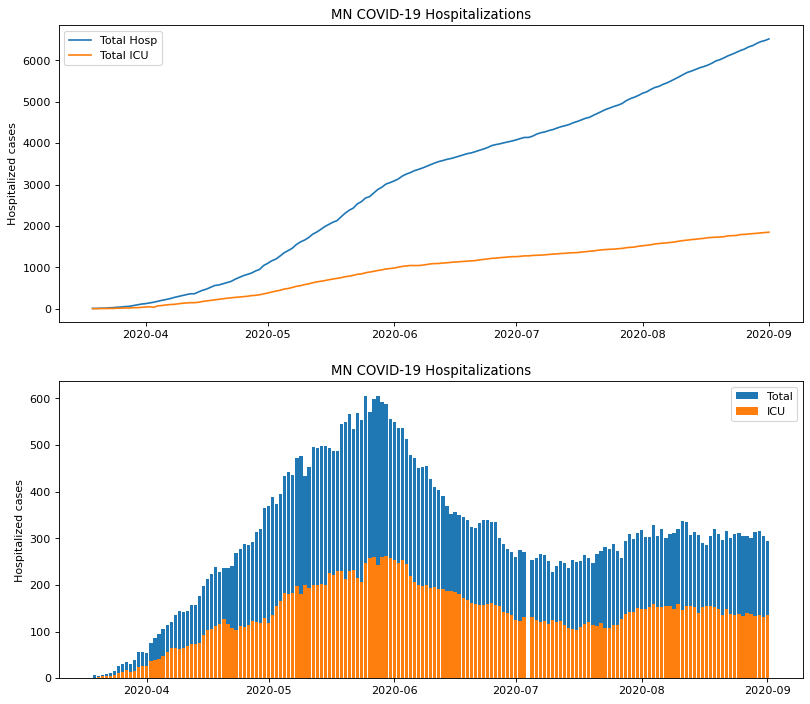

In [17]:
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.autofmt_xdate()
ax_cumm = fig.add_subplot(211)
ax_dly = fig.add_subplot(212)
ax_cumm.plot(mn_covid_df.index, mn_covid_df["hosp_total"], label='Total Hosp')
ax_cumm.plot(mn_covid_df.index, mn_covid_df["hosp_icu_total"], label='Total ICU')
ax_dly.bar(mn_covid_df.index, mn_covid_df["hosp_daily_not_icu"] + mn_covid_df["hosp_daily_icu"], label='Total')
ax_dly.bar(mn_covid_df.index, mn_covid_df["hosp_daily_icu"], label='ICU')
for ax in [ax_cumm, ax_dly]:
    ax.xaxis.set_major_locator(months)
    ax.legend()
    ax.set_title('MN COVID-19 Hospitalizations')
    ax.set_ylabel('Hospitalized cases')


## My analysis
### Moving average
Some data, like testing and positive cases, show a weekly period ie 5-days-high then 2-days-low. So a 7-day moving average is probably a sensible window.

In [18]:
AVG_WINDOW = 7

#### Testing moving average

Text(0.5, 1.0, 'MN COVID-19 daily tests')

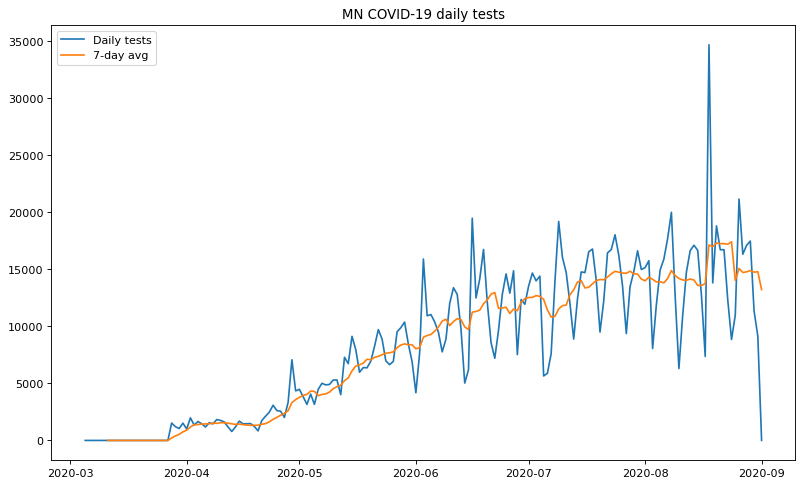

In [19]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.plot(mn_covid_df.index, mn_covid_df[['tests_daily_mdh', 'test_daily_ext']].sum(axis=1), label='Daily tests')
ax.plot(mn_covid_df.index, mn_covid_df[['tests_daily_mdh', 'test_daily_ext']].sum(axis=1).rolling(window=AVG_WINDOW).mean(), label='7-day avg')
ax.legend()
ax.set_title('MN COVID-19 daily tests')

#### MN positive cases

Text(0, 0.5, 'total')

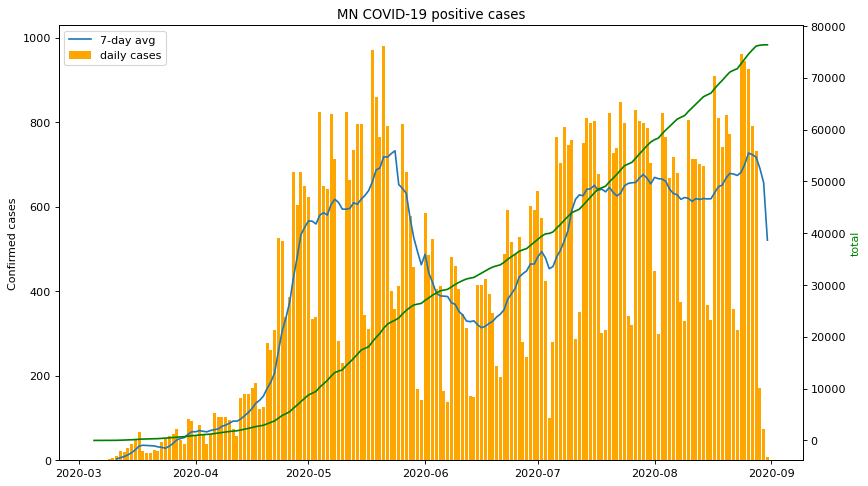

In [20]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.bar(mn_covid_df.index, mn_covid_df["cases_positive"], label='daily cases', color='orange')
ax.plot(mn_covid_df.index, mn_covid_df['cases_positive'].rolling(window=AVG_WINDOW).mean(), label='7-day avg')
ax.xaxis.set_major_locator(months)
ax.set_title('MN COVID-19 positive cases')
ax.set_ylabel('Confirmed cases')
ax.legend()
ax_total = ax.twinx()
ax_total.plot(mn_covid_df.index, mn_covid_df["cases_positive"].cumsum(), label='total', color='green')
ax_total.set_ylabel('total', color='green')

#### Deaths

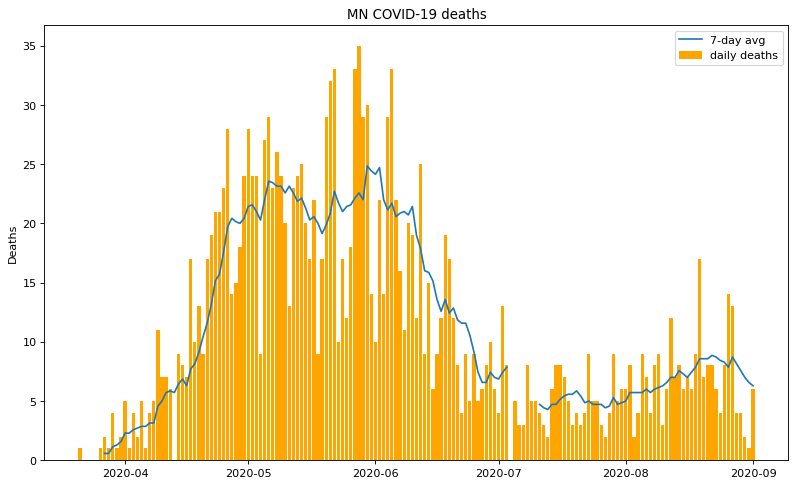

In [21]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.bar(mn_covid_df.index, mn_covid_df["deaths_daily_new"], label='daily deaths', color='orange')
ax.plot(mn_covid_df.index, mn_covid_df['deaths_daily_new'].rolling(window=AVG_WINDOW).mean(), label='7-day avg')
ax.xaxis.set_major_locator(months)
ax.set_title('MN COVID-19 deaths')
ax.set_ylabel('Deaths')
ax.legend()

#### Hospitalizations

Text(737586.0, 1222, 'ICU bed capacity')

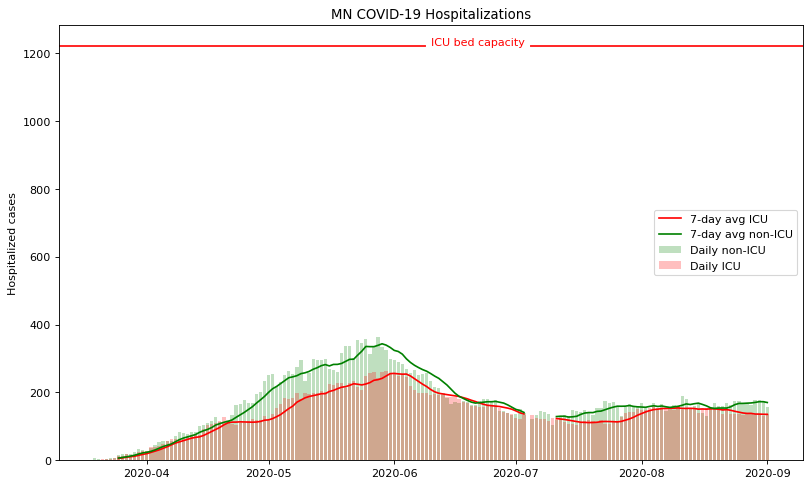

In [22]:
ICU_BED_CAP = 1222 # https://mn.gov/covid19/data/response-prep/response-capacity.jsp
ICU_COLOR = 'red'
NOT_ICU_COLOR = 'green'
ALL_HOSP_COLOR = 'blue'

fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
#ax.bar(mn_covid_df.index, mn_covid_df[['hosp_daily_not_icu', 'hosp_daily_icu']].sum(axis=1), label='Daily Hosp', color=ALL_HOSP_COLOR, alpha=0.25)
ax.bar(mn_covid_df.index, mn_covid_df['hosp_daily_not_icu'], label='Daily non-ICU', color=NOT_ICU_COLOR, alpha=0.25)
ax.bar(mn_covid_df.index, mn_covid_df["hosp_daily_icu"], label='Daily ICU', color=ICU_COLOR, alpha=0.25)
#ax.plot(mn_covid_df.index, mn_covid_df[['hosp_daily_not_icu', 'hosp_daily_icu']].sum(axis=1).rolling(window=AVG_WINDOW).mean(), color=ALL_HOSP_COLOR, label='7-day avg all')
ax.plot(mn_covid_df.index, mn_covid_df['hosp_daily_icu'].rolling(window=AVG_WINDOW).mean(), color=ICU_COLOR, label='7-day avg ICU')
ax.plot(mn_covid_df.index, mn_covid_df['hosp_daily_not_icu'].rolling(window=AVG_WINDOW).mean(), color=NOT_ICU_COLOR, label='7-day avg non-ICU')

ax.xaxis.set_major_locator(months)
ax.legend()
ax.set_title('MN COVID-19 Hospitalizations')
ax.set_ylabel('Hospitalized cases')

ax.axhline(y=ICU_BED_CAP, color=ICU_COLOR)
xmin, xmax = ax.get_xlim()
ax.text((xmax + xmin)/2, ICU_BED_CAP, 'ICU bed capacity', color=ICU_COLOR, backgroundcolor='white')

### Rates

Divide some metrics by the number of tests

#### Postive test rate

Positive test cases divided by the number of test results

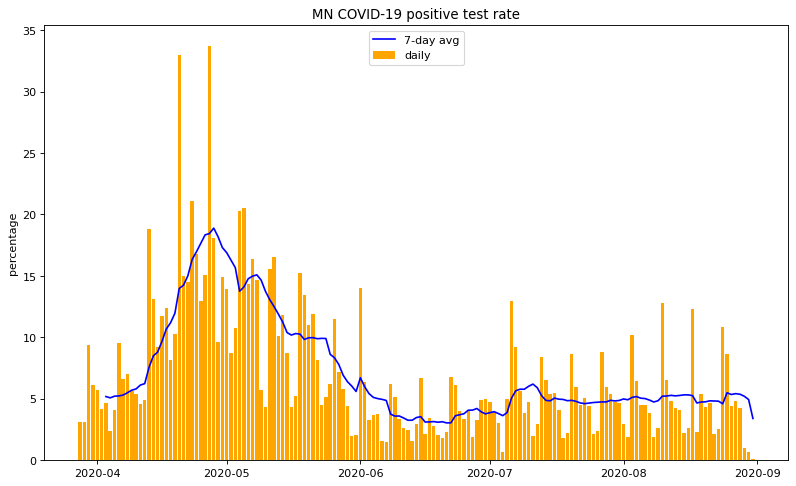

In [23]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.bar(
    mn_covid_df.index,
    100*mn_covid_df["cases_positive"]/mn_covid_df[['tests_daily_mdh', 'test_daily_ext']].sum(axis=1),
    label='daily', color='orange')
ax.plot(
    mn_covid_df.index,
    100*(mn_covid_df["cases_positive"]/mn_covid_df[['tests_daily_mdh', 'test_daily_ext']].sum(axis=1)).rolling(window=AVG_WINDOW).mean(),
    label='7-day avg', color='blue')
ax.xaxis.set_major_locator(months)
ax.set_title('MN COVID-19 positive test rate')
ax.set_ylabel('percentage')
ax.legend()

#### Death rate

Deaths divided by the number of positive cases

Text(0, 0.5, 'total')

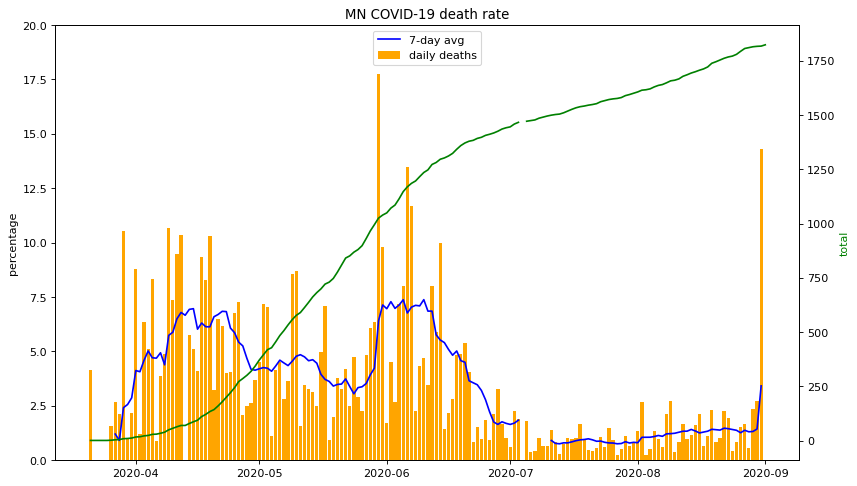

In [24]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.bar(
    mn_covid_df.index,
    100*mn_covid_df["deaths_daily_new"]/mn_covid_df["cases_positive"],
    label='daily deaths', color='orange')
ax.plot(
    mn_covid_df.index,
    100*(mn_covid_df["deaths_daily_new"]/mn_covid_df["cases_positive"]).rolling(window=AVG_WINDOW).mean(),
    label='7-day avg', color='blue')
ax.xaxis.set_major_locator(months)
ax.set_title('MN COVID-19 death rate')
ax.set_ylabel('percentage')
ax.legend()
ax.set_ylim([0, 20])
ax_total = ax.twinx()
ax_total.plot(mn_covid_df["deaths_daily_new"].cumsum(), label='total', color='green')
ax_total.set_ylabel('total', color='green')
#plt.ylim(0, 20)

#### Hospitalization rate

Hospitalizations divided by positive test cases

(0.0, 100.0)

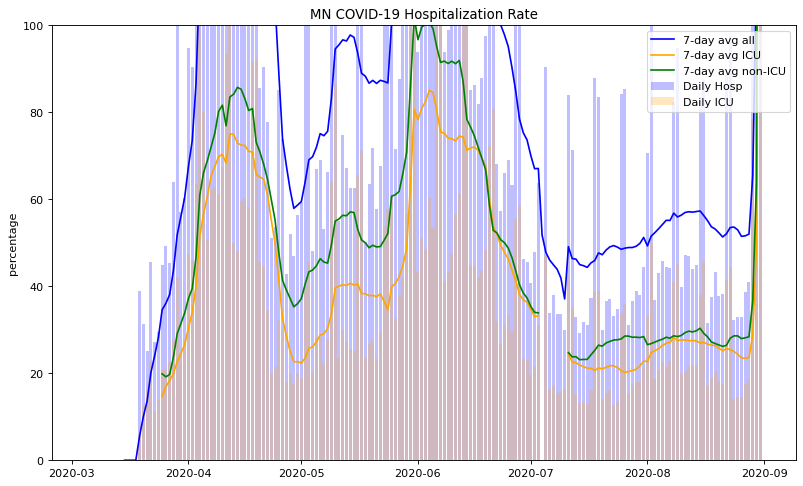

In [25]:
fig = plt.figure(figsize=(12, 8), dpi=80)
fig.autofmt_xdate()
ax = fig.add_subplot(111)
ax.bar(
    mn_covid_df.index,
    100*mn_covid_df[['hosp_daily_not_icu', 'hosp_daily_icu']].sum(axis=1)/mn_covid_df["cases_positive"],
    label='Daily Hosp', color='blue', alpha=0.25)
ax.bar(
    mn_covid_df.index,
    100*mn_covid_df["hosp_daily_icu"]/mn_covid_df["cases_positive"],
    label='Daily ICU', color='orange', alpha=0.25)
ax.plot(
    mn_covid_df.index,
    100*(mn_covid_df[['hosp_daily_not_icu', 'hosp_daily_icu']].sum(axis=1)/mn_covid_df["cases_positive"]).rolling(window=AVG_WINDOW).mean(),
    color='blue', label='7-day avg all')
ax.plot(
    mn_covid_df.index,
    100*(mn_covid_df['hosp_daily_icu']/mn_covid_df["cases_positive"]).rolling(window=AVG_WINDOW).mean(),
    color='orange', label='7-day avg ICU')
ax.plot(
    mn_covid_df.index,
    100*(mn_covid_df['hosp_daily_not_icu']/mn_covid_df["cases_positive"]).rolling(window=AVG_WINDOW).mean(),
    color='green', label='7-day avg non-ICU')

ax.xaxis.set_major_locator(months)
ax.legend()
ax.set_title('MN COVID-19 Hospitalization Rate')
ax.set_ylabel('percentage')
plt.ylim(0, 100)

In [26]:
mn_covid_df["cases_positive"].tail()

date
2020-08-28    733.0
2020-08-29    171.0
2020-08-30     73.0
2020-08-31      7.0
2020-09-01      NaN
Freq: D, Name: cases_positive, dtype: float64